In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv(r'C:/Users/SHOFCO SUN/Desktop/FIA Dataset/Train.csv')
test = pd.read_csv(r'C:/Users/SHOFCO SUN/Desktop/FIA Dataset/Test.csv')
SampleSubmission = pd.read_csv(r'C:/Users/SHOFCO SUN/Desktop/FIA Dataset/SampleSubmission.csv')
VariableDefinitions = pd.read_csv(r'C:/Users/SHOFCO SUN/Desktop/FIA Dataset/VariableDefinitions.csv')

In [3]:
#realizing the volume of data before synthesis
#checking dimension of the data
#every value represented by the turple corresponds to the actual value of the arrays/rows/columns



In [4]:
print('Shape of the train data', train.shape, sep = '-->')
print('Shape of the test data', test.shape, sep = '-->')
print(VariableDefinitions)


Shape of the train data-->(23524, 13)
Shape of the test data-->(10086, 12)
      Variable Definitions                                         Unnamed: 1
0                  country                         Country interviewee is in.
1                     year                           Year survey was done in.
2                 uniqueid             Unique identifier for each interviewee
3            location_type                     Type of location: Rural, Urban
4         cellphone_access  If interviewee has access to a cellphone: Yes, No
5           household_size               Number of people living in one house
6        age_of_respondent                         The age of the interviewee
7     gender_of_respondent                Gender of interviewee: Male, Female
8   relationship_with_head  The interviewee’s relationship with the head o...
9           marital_status  The martial status of the interviewee: Married...
10         education_level  Highest level of education: No formal e

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10086 entries, 0 to 10085
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 10086 non-null  object
 1   year                    10086 non-null  int64 
 2   uniqueid                10086 non-null  object
 3   location_type           10086 non-null  object
 4   cellphone_access        10086 non-null  object
 5   household_size          10086 non-null  int64 
 6   age_of_respondent       10086 non-null  int64 
 7   gender_of_respondent    10086 non-null  object
 8   relationship_with_head  10086 non-null  object
 9   marital_status          10086 non-null  object
 10  education_level         10086 non-null  object
 11  job_type                10086 non-null  object
dtypes: int64(3), object(9)
memory usage: 945.7+ KB


In [7]:
train.isnull().sum()
#The dataset has  no missing values

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [8]:
train.head(7)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
5,Kenya,2018,uniqueid_6,No,Rural,No,7,26,Female,Spouse,Married/Living together,Primary education,Informally employed
6,Kenya,2018,uniqueid_7,No,Rural,Yes,7,32,Female,Spouse,Married/Living together,Primary education,Self employed


In [9]:
#finding the number of unique value for each variable/feature
feature_count = train.nunique(dropna = False)
feature_count.sort_values()[:10]

bank_account               2
location_type              2
cellphone_access           2
gender_of_respondent       2
year                       3
country                    4
marital_status             5
relationship_with_head     6
education_level            6
job_type                  10
dtype: int64

In this case the target variable is bank_Account,
Analysis by using pivoting features which in this case I picked unique features

In [10]:
split=train.shape[0]
datasets=pd.concat([train,test],axis=0)

In [11]:
datasets.shape

(33610, 13)

## Data visualizations and Univariate analysis

<AxesSubplot:xlabel='country', ylabel='count'>

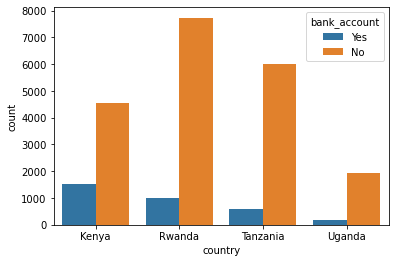

In [12]:
#country
sns.countplot(x=datasets['country'], hue = datasets['bank_account'])

<AxesSubplot:xlabel='year', ylabel='count'>

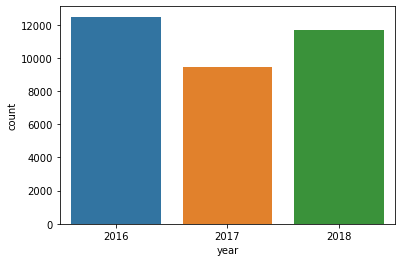

In [13]:
sns.countplot(x = datasets['year'])

In [14]:
# Reviewing class distribution of country_year_bankAccount
country_year_bankAccount = datasets.groupby(['country','year','bank_account'] ).size()
country_year_bankAccount

country   year  bank_account
Kenya     2018  No              4547
                Yes             1521
Rwanda    2016  No              7732
                Yes             1003
Tanzania  2017  No              6013
                Yes              607
Uganda    2018  No              1920
                Yes              181
dtype: int64

In [15]:
# Review on class distribution of cell phone access with a focus on bank_account
bankAccount_cellPhone = datasets.groupby(['bank_account', 'cellphone_access']).size()
bankAccount_cellPhone

bank_account  cellphone_access
No            No                   5966
              Yes                 14246
Yes           No                    104
              Yes                  3208
dtype: int64

In [16]:
ruralUrban_Pop = datasets.groupby(['location_type', 'year']).size()
ruralUrban_Pop

location_type  year
Rural          2016    10688
               2017     2613
               2018     7231
Urban          2016     1792
               2017     6846
               2018     4440
dtype: int64

<AxesSubplot:xlabel='location_type', ylabel='count'>

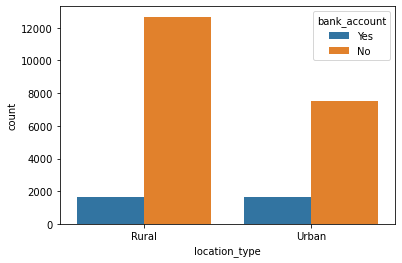

In [17]:
sns.countplot(data=datasets, x = 'location_type', hue = 'bank_account')

<AxesSubplot:title={'center':'Gender distribution vs bank account ownership'}, xlabel='gender_of_respondent', ylabel='count'>

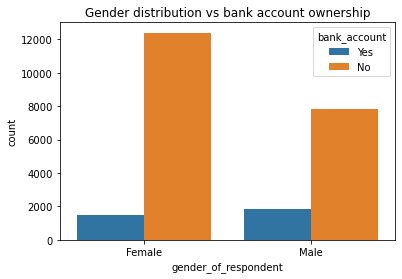

In [18]:
# focus on gender of the respondent
plt.title('Gender distribution vs bank account ownership')
sns.countplot(data=datasets, x = 'gender_of_respondent', hue = 'bank_account')

In [19]:
genderBySize = datasets.groupby(['gender_of_respondent','bank_account']).size()
genderBySize

gender_of_respondent  bank_account
Female                No              12395
                      Yes              1482
Male                  No               7817
                      Yes              1830
dtype: int64

In [20]:
# Review on relationship with the head with a focus on bank account ownership
relationWithThe_head = datasets.groupby(['relationship_with_head', 'bank_account']).size()
relationWithThe_head

relationship_with_head  bank_account
Child                   No               2036
                        Yes               193
Head of Household       No              10558
                        Yes              2273
Other non-relatives     No                170
                        Yes                20
Other relative          No                602
                        Yes                66
Parent                  No               1021
                        Yes                65
Spouse                  No               5825
                        Yes               695
dtype: int64

<AxesSubplot:title={'center':'Interviewee relationship with the head of the family'}, xlabel='relationship_with_head', ylabel='count'>

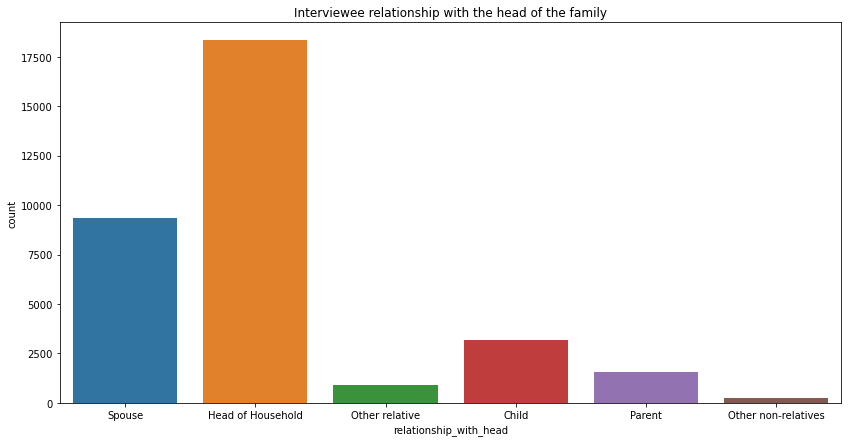

In [21]:
plt.figure(figsize=(14,7))
plt.title('Interviewee relationship with the head of the family')
sns.countplot(data=datasets, x='relationship_with_head')

In [22]:
# maritalStatus
maritalStatus = datasets.groupby(['marital_status', 'bank_account']).size()
maritalStatus

marital_status           bank_account
Divorced/Seperated       No              1842
                         Yes              234
Dont know                No                 6
                         Yes                2
Married/Living together  No              8883
                         Yes             1866
Single/Never Married     No              7017
                         Yes              966
Widowed                  No              2464
                         Yes              244
dtype: int64

<AxesSubplot:xlabel='marital_status', ylabel='count'>

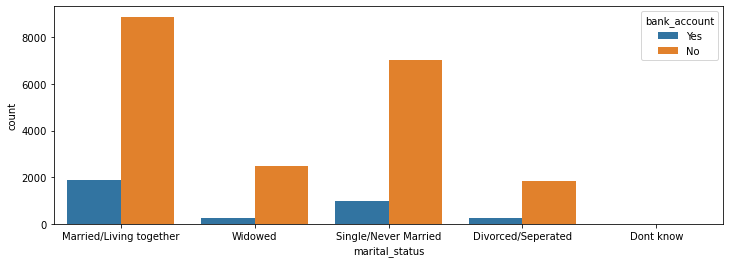

In [23]:
plt.figure(figsize=(12,4))
sns.countplot(data=datasets, x='marital_status', hue = 'bank_account')

In [24]:
# Review on education level distribution
educationLevel = datasets.groupby(['education_level', 'bank_account']).size()
educationLevel

education_level                  bank_account
No formal education              No               4339
                                 Yes               176
Other/Dont know/RTA              No                 24
                                 Yes                11
Primary education                No              11698
                                 Yes              1093
Secondary education              No               3240
                                 Yes               983
Tertiary education               No                566
                                 Yes               591
Vocational/Specialised training  No                345
                                 Yes               458
dtype: int64

<AxesSubplot:xlabel='education_level', ylabel='count'>

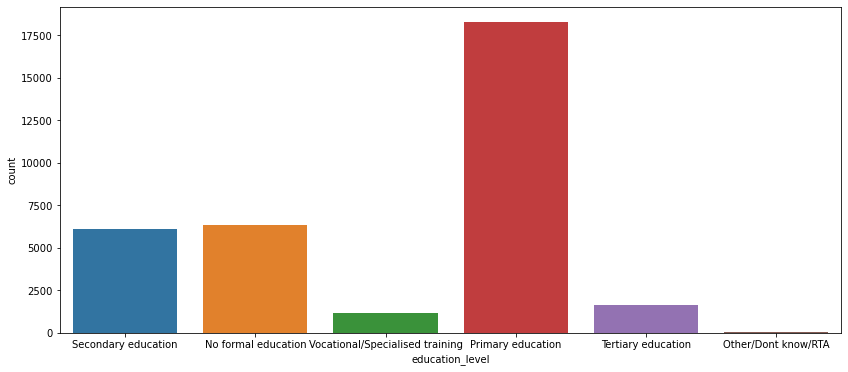

In [25]:
plt.figure(figsize=(14,6))
sns.countplot(data=datasets, x='education_level')

In [26]:
# Review in job type with a focus on bank account ownership (Y/N)
jobType = datasets.groupby(['job_type',  'bank_account']).size()
jobType

job_type                      bank_account
Dont Know/Refuse to answer    No               112
                              Yes               14
Farming and Fishing           No              4806
                              Yes              635
Formally employed Government  No                87
                              Yes              300
Formally employed Private     No               484
                              Yes              571
Government Dependent          No               197
                              Yes               50
Informally employed           No              5152
                              Yes              445
No Income                     No               614
                              Yes               13
Other Income                  No               884
                              Yes              196
Remittance Dependent          No              2287
                              Yes              240
Self employed                 No       

<AxesSubplot:title={'center':'Age of Respondent Distribution'}, xlabel='age_of_respondent', ylabel='Density'>

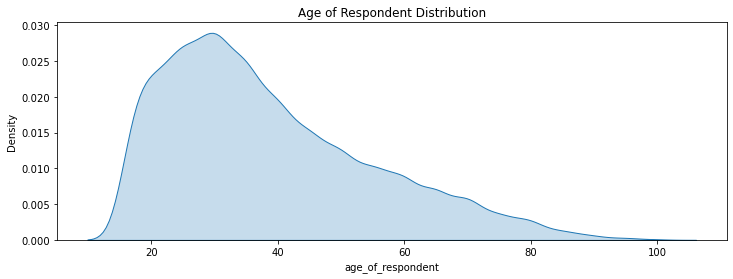

In [27]:
# Review on age of the respondent
plt.figure(figsize=(12,4))
plt.title('Age of Respondent Distribution')
sns.kdeplot(data=datasets['age_of_respondent'], shade= True)

<AxesSubplot:xlabel='household_size', ylabel='Density'>

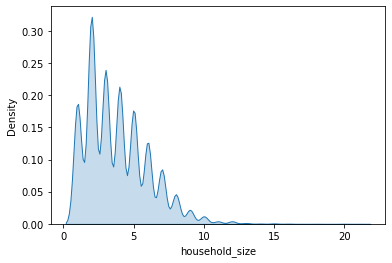

In [28]:
# Household size review
sns.kdeplot(data = datasets['household_size'], shade = True)

<AxesSubplot:xlabel='household_size'>

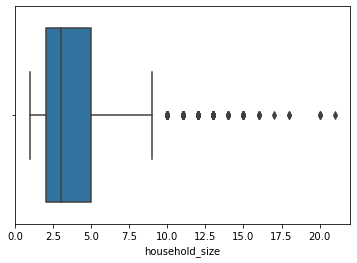

In [29]:
sns.boxplot(data=datasets, x = 'household_size')

c:\Users\SHOFCO SUN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='household_size', ylabel='Density'>

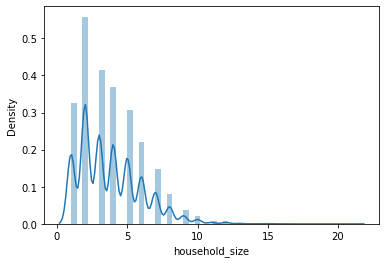

In [31]:
# from the observation there are presence of outliers
# since our data set is skewed we will use IQR proximity rule 
sns.distplot(datasets['household_size'])

In [36]:
# finding the IQR
percentile25 = datasets['household_size'].quantile(0.25)
percentile75 = datasets['household_size'].quantile(0.75)
iqr = percentile75 - percentile25
print(f"The inter quatile range for housold size is {iqr}.")


The inter quatile range for housold size is 3.0.


In [39]:
#finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr    
print(upper_limit,lower_limit)


9.5 -2.5


In [44]:
#use my upper and lower fences to highlight any outliers